In [8]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
# train data

raw_data =  pd.read_csv("C:\\Users\\user\\Desktop\\GBC\\4000_ML1\\ClassificationModels\\resources\\aug_train.csv")

In [9]:
# preprocessing function
def preprocessing_data(df: pd.DataFrame):
    data = df.copy()
    # drop NaN values for some columns
    data = data.dropna(subset=['education_level','major_discipline', 'experience', 'last_new_job'])
    # Replace other NaN with Unknown value 
    data = data.replace(np.nan,'Unknown')
    # relevent_experience replace with 0 and 1, 1 for having experience and 0 for no experience
    data['relevent_experience'] = data['relevent_experience'].replace(['Has relevent experience','No relevent experience'],[1,0])

    # manually assign ordinal numbers to education_level and company_size
    # for graduate level I will give 1 and for master 2 and for phd 3. Graduate level can be equals to masters and phd but usually people with phd would not represent themselves as graduate. 
    # any graduate level certificate can be considered as graduate so I will assign a lower number to graduate than masters. 
    # for company_size unknown will get 0.
    
    data['education_level'] = data['education_level'].replace(['Graduate','Masters','Phd'],[1,2,3])
    data['company_size'] = data['company_size'].replace(['Unknown','<10', '10/49','50-99', '100-500','500-999','1000-4999','5000-9999','10000+'] ,range(0,9))

    # convert experience and last_new_job to numeric values
    data['experience'] = data['experience'].str.replace('>','').str.replace('<','')
    data['experience'] = pd.to_numeric(data['experience'])

    data['last_new_job'] = data['last_new_job'].str.replace('>','')
    data['last_new_job'] = data['last_new_job'].replace('never',0)
    data['last_new_job'] = pd.to_numeric(data['last_new_job'])

    data = pd.get_dummies(data, columns = ['company_type', 'enrolled_university', 'gender', 'major_discipline','city'])
    
    #Normalize data using MinMaxScaler function of sci-kit leaern
    x = data.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    data_scaled = pd.DataFrame(x_scaled, columns = data.columns)
    return(data_scaled)

In [10]:
processed_data = preprocessing_data(raw_data)
processed_data

,enrollee_id,city_development_index,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,target,company_type_Early Stage Startup,...,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99
0,0.268051,0.942116,1.0,0.0,1.000000,0.000,0.25,0.104478,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.890497,0.654691,0.0,0.0,0.736842,0.375,1.00,0.137313,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.346306,0.351297,0.0,0.0,0.210526,0.000,0.00,0.244776,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.995836,0.680639,0.0,0.0,0.000000,0.000,0.00,0.152239,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.019893,0.636727,1.0,0.5,1.000000,0.375,1.00,0.020896,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16002,0.968033,0.942116,1.0,0.0,0.473684,0.500,0.75,0.065672,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16003,0.891366,0.942116,1.0,0.0,0.315789,0.250,0.25,0.071642,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16004,0.221224,0.858283,0.0,0.0,0.684211,0.000,0.25,0.122388,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16005,0.940620,0.942116,1.0,0.0,0.684211,0.000,1.00,0.152239,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X = processed_data.drop(columns='target')
X

,enrollee_id,city_development_index,relevent_experience,education_level,experience,company_size,last_new_job,training_hours,company_type_Early Stage Startup,company_type_Funded Startup,...,city_city_84,city_city_89,city_city_9,city_city_90,city_city_91,city_city_93,city_city_94,city_city_97,city_city_98,city_city_99
0,0.268051,0.942116,1.0,0.0,1.000000,0.000,0.25,0.104478,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.890497,0.654691,0.0,0.0,0.736842,0.375,1.00,0.137313,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.346306,0.351297,0.0,0.0,0.210526,0.000,0.00,0.244776,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.995836,0.680639,0.0,0.0,0.000000,0.000,0.00,0.152239,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.019893,0.636727,1.0,0.5,1.000000,0.375,1.00,0.020896,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16002,0.968033,0.942116,1.0,0.0,0.473684,0.500,0.75,0.065672,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16003,0.891366,0.942116,1.0,0.0,0.315789,0.250,0.25,0.071642,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16004,0.221224,0.858283,0.0,0.0,0.684211,0.000,0.25,0.122388,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16005,0.940620,0.942116,1.0,0.0,0.684211,0.000,1.00,0.152239,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
Y = processed_data['target']
Y

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
16002    0.0
16003    0.0
16004    1.0
16005    1.0
16006    0.0
Name: target, Length: 16007, dtype: float64

In [13]:
print(X.shape)
print(Y.shape)

(16007, 151)
(16007,)


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X, Y,test_size = 0.3, random_state = 1)

In [16]:
print(X_train.shape)
print(y_train.shape)

(11204, 151)
(11204,)


In [20]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [27]:
dec_tree = tree.DecisionTreeClassifier(random_state=1)

In [36]:
para_grid = {'criterion': ['gini','entropy'],
            'splitter' : ['best','random'],
            'max_depth' : [2,3,4,5,6,7,8],
            'min_samples_split' : [2,3,4,5],
            'min_samples_split' : [2,3,4,5]}

In [37]:
r_search = RandomizedSearchCV(dec_tree,para_grid,random_state=1)

In [38]:
r_search.fit(X_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=1),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'splitter': ['best', 'random']},
                   random_state=1)

In [39]:
r_search.best_params_

{'splitter': 'best',
 'min_samples_split': 3,
 'max_depth': 5,
 'criterion': 'entropy'}

In [40]:
r_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=3,
                       random_state=1)

In [41]:
grid_pred = r_search.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model Accuracy score: {0:0.4f}'. format(accuracy_score(y_test, grid_pred)))

Model Accuracy score: 0.8010


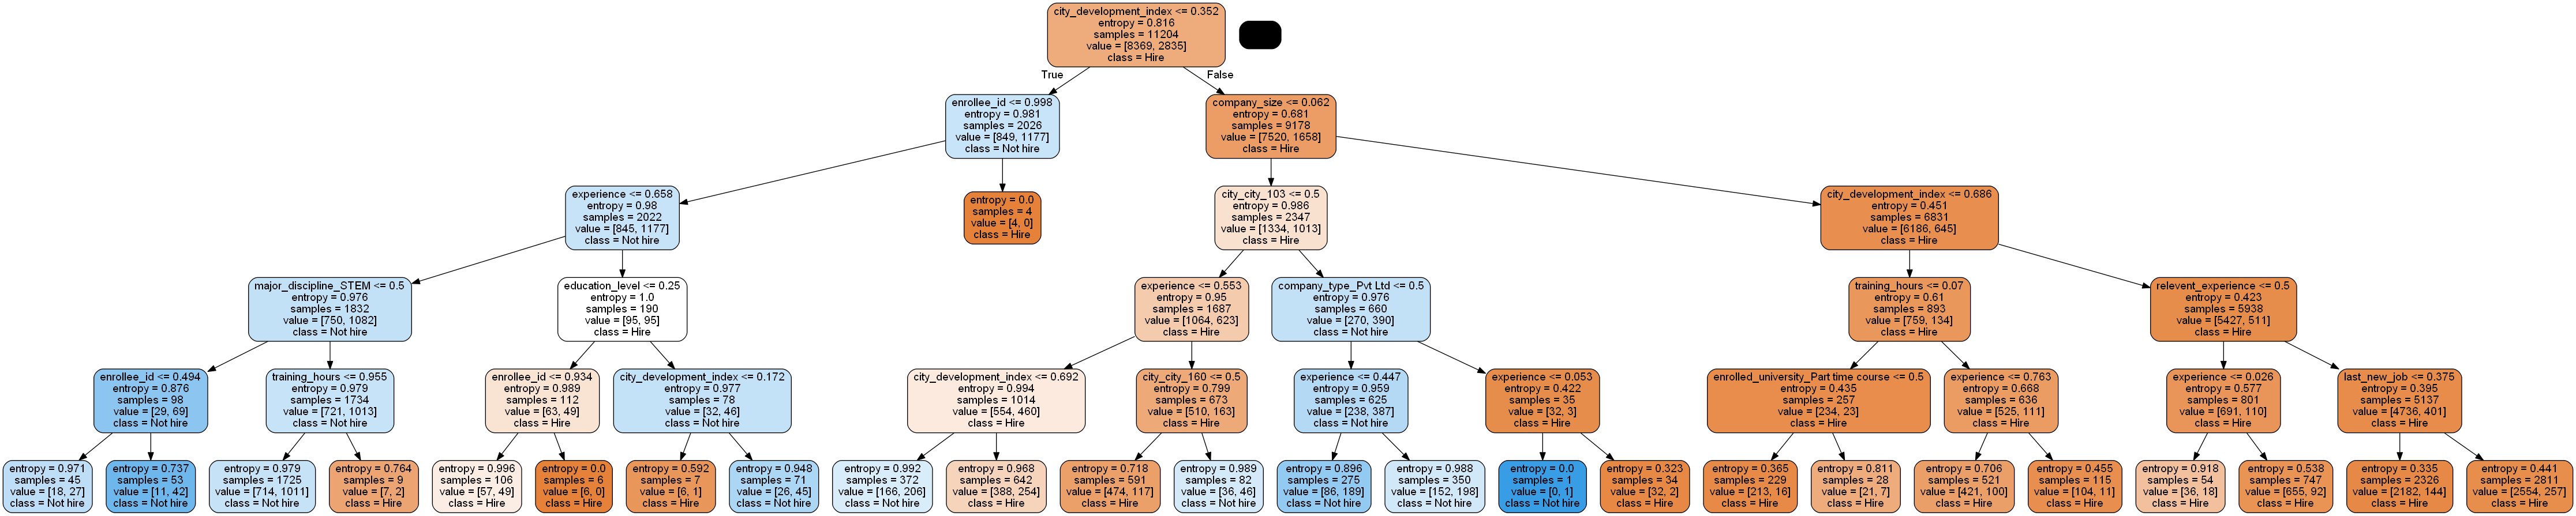

In [53]:
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO
from subprocess import call
from IPython.display import Image
estimator = r_search.best_estimator_
#export_graphviz(estimator, out_file ='tree.dot', rounded = True, 
                #feature_names=train.columns, max_depth = 8, 
                #class_names = ['poverty', 'no poverty'], filled = True)
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                max_depth = 5,
                feature_names = X_train.columns,
                class_names=['Hire', 'Not hire'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('Pre_Tree.png')
Image(graph.create_png())